**Goal:**  
Problem 1.3: Prompt Templating
Use a prompt template to structure your input to the LLM.

**Task:**  
1. Take two inputs:  
   - A topic (e.g., "machine learning")  
   - An audience (e.g., "a 5-year-old")  
2. Use `ChatPromptTemplate` to create a prompt like:  
   `"Explain {topic} to {audience}."`  
3. Format the prompt using `format_messages`.  
4. Send it to the LLM and print the response.

**LangChain Concepts:**  
- ChatPromptTemplate  
- from_template  
- format_messages

**Check:**  
- Does the output match the topic and audience?  
- Try different combinations of topics and audiences.


In [27]:
from dotenv import load_dotenv

from langchain_core.messages import AIMessage, HumanMessage, SystemMessage, BaseMessage

from typing import List,Optional, TypedDict, Sequence, Annotated

from langchain.prompts import ChatPromptTemplate

from langchain_google_genai import ChatGoogleGenerativeAI
from langgraph.graph.message import add_messages

from langgraph.graph import StateGraph,START,END

In [28]:
load_dotenv()

True

In [29]:
## state definition

class AgentState(TypedDict):
    question : str
    answer : str

In [30]:
# ---- Model Binding ----
llm = ChatGoogleGenerativeAI(
    model="gemini-1.5-flash-latest", temperature=0.7
)


In [31]:
def user_query(state: AgentState) -> AgentState:
    """
        takes input from user and stores it in respective attribute
    """
    # Create a prompt with both System and Human messages
    template = ChatPromptTemplate.from_messages([
        ("system", "You are a friendly and simple explainer who adjusts answers for any audience."),
        ("human", "Explain {topic} to {audience}.")
    ])
    topic = input("topic ->") 
    role = input("role ->") 
    # state["question"] = query_1
    # query = HumanMessage(content=query_1)
    # print(query)
    
    # state["question"] = query_1
    # print(state)
    messages = template.format_messages(topic=topic, audience=role)

    return {"question":messages}

In [32]:
def get_response(state: AgentState) -> AgentState:
    
    """
        prompt our llm with the question and get a response.
    """
    # invoke , stream , batch
    # invoke - input - output
    # stream - cont inp - out 
    # batch send a batch and paralelize them 
    # sys_prompt = SystemMessage(content="you are a ai assistant that answers questions in a clear and explanatory way")
    # prompt = HumanMessage(content=state['question'])
    response = llm.invoke(state['question'])
    
    # print(response.type)
    # print(prompt.type)
    return {"answer" : response.content}

In [33]:
graph = StateGraph(AgentState)

graph.add_node("prompt", user_query)
graph.add_node("resp", get_response)

graph.add_edge(START,"prompt")
graph.add_edge("prompt", "resp")
graph.add_edge("resp", END)

app = graph.compile()

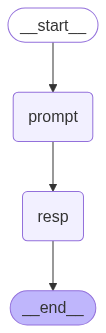

In [34]:
from IPython.display import Image, display
from io import BytesIO

# Get image bytes directly from your graph generator
image_bytes = app.get_graph().draw_mermaid_png()

# Display the image without saving
display(Image(data=image_bytes))


In [35]:
## run agent
state = {"question" : "" , "answer" : ""}
result = app.invoke(state)
print(result["answer"])

Imagine you have a really cool triangle!  It's a special triangle called a right triangle, because it has one pointy corner that's like a perfect square corner.

Now, imagine you build squares on each of the triangle's sides.  You'll have three squares, one on each side.

The Pythagoras Theorem is a secret about these squares! It says that if you add up the areas of the *two smaller* squares (the ones on the shorter sides of the triangle), it will *always* equal the area of the *biggest* square (the one on the longest side).

It's like magic!  The areas of the squares are always related in this special way for right triangles.
